<a href="https://colab.research.google.com/github/rohitajay/DataAnalysis-Notebooks/blob/main/Data_Analysis_NYC_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 
import pandas as pd

october_path = "/content/drive/MyDrive/NY Taxi Data/october/"

os.listdir(october_path)

# df_yellow= pd.read_parquet(october_path + 'yellow_tripdata_2022-10.parquet',) 

df_green = pd.read_parquet(october_path + 'yellow_tripdata_2022-10.parquet',) 

# df_green = pd.read_parquet(october_path + 'green_tripdata_2022-10.parquet')

df_tripData_fhv =  pd.read_parquet(october_path + 'fhv_tripdata_2022-10.parquet')

df_tripData_fhvhv = pd.read_parquet(october_path + 'fhvhv_tripdata_2022-10.parquet')

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,1,0.116357,0.000782,Newark Airport,1,EWR
1,2,0.433470,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,0.000498,Arden Heights,5,Staten Island


In [ ]:
## Taxi Zones 

# !pip install simpledbf

from simpledbf import Dbf5

df_zone = Dbf5("/content/drive/MyDrive/NY Taxi Data/taxi_zones/taxi_zones.dbf").to_dataframe()
df_zone.head()


df_zone.set_index('LocationID',inplace=True)
borough_dict = df_zone.to_dict()["borough"]

zone_dict = df_zone.to_dict()["zone"]

# zone_dict

In [ ]:
df_green_copy

In [ ]:
# View all columns on the screen
pd.set_option('max_columns', 100)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',1000)

In [ ]:
df_green['trip_time_in_sec'] = (df_green['lpep_dropoff_datetime'] - df_green["lpep_pickup_datetime"]).dt.total_seconds().astype(int)

In [ ]:
df_green.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time_in_sec
0,2,2022-10-01 00:38:35,2022-10-01 00:51:03,N,1.0,256,225,1.0,2.47,11.5,0.5,0.5,2.56,0.0,None,0.3,15.36,1.0,1.0,0.00,748
1,2,2022-10-01 01:06:08,2022-10-01 01:12:33,N,1.0,166,152,1.0,1.96,7.5,0.5,0.5,2.20,0.0,None,0.3,11.00,1.0,1.0,0.00,385
2,2,2022-10-01 00:31:40,2022-10-01 00:45:15,N,1.0,74,262,1.0,2.43,11.5,0.5,0.5,2.00,0.0,None,0.3,17.55,1.0,1.0,2.75,815
3,2,2022-10-01 00:51:12,2022-10-01 00:58:42,N,1.0,74,42,1.0,2.25,8.5,0.5,0.5,1.96,0.0,None,0.3,11.76,1.0,1.0,0.00,450
4,1,2022-10-01 00:42:58,2022-10-01 00:54:33,N,1.0,74,247,1.0,0.00,17.2,0.0,0.5,0.00,0.0,None,0.3,18.00,1.0,1.0,0.00,695


In [ ]:
df_green['VendorID'] = df_green['VendorID'].replace({ 1 : "CMT", 2 : "VeriFone Inc"})

df_green['RatecodeID'] = df_green['RatecodeID'].replace({ 1.0 : "Standard rate", 2.0 : "JFK", 3.0 : "Newark", 4.0 : "Nassau or Westchester", 5.0 : "Negotiated fare", 6.0 : "Group ride"})

df_green['store_and_fwd_flag'] = df_green['store_and_fwd_flag'].replace({ "Y" : "store and forward trip", "N" : "not a store and forward trip"})

df_green['payment_type'] = df_green['payment_type'].replace({ 1 : "Credit card", 2 : "Cash", 3: "No charge", 4: "Dispute", 5 : "Unknown", 6 : "Voided trip"}) 

df_green['trip_type'] = df_green['trip_type'].replace({ 1 : "Street-hail", 2 : "Dispatch"})

In [ ]:
df_green.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time_in_sec
0,VeriFone Inc,2022-10-01 00:38:35,2022-10-01 00:51:03,not a store and forward trip,Standard rate,256,225,1.0,2.47,11.5,0.5,0.5,2.56,0.0,None,0.3,15.36,Credit card,Street-hail,0.00,748
1,VeriFone Inc,2022-10-01 01:06:08,2022-10-01 01:12:33,not a store and forward trip,Standard rate,166,152,1.0,1.96,7.5,0.5,0.5,2.20,0.0,None,0.3,11.00,Credit card,Street-hail,0.00,385
2,VeriFone Inc,2022-10-01 00:31:40,2022-10-01 00:45:15,not a store and forward trip,Standard rate,74,262,1.0,2.43,11.5,0.5,0.5,2.00,0.0,None,0.3,17.55,Credit card,Street-hail,2.75,815
3,VeriFone Inc,2022-10-01 00:51:12,2022-10-01 00:58:42,not a store and forward trip,Standard rate,74,42,1.0,2.25,8.5,0.5,0.5,1.96,0.0,None,0.3,11.76,Credit card,Street-hail,0.00,450
4,CMT,2022-10-01 00:42:58,2022-10-01 00:54:33,not a store and forward trip,Standard rate,74,247,1.0,0.00,17.2,0.0,0.5,0.00,0.0,None,0.3,18.00,Credit card,Street-hail,0.00,695


In [ ]:
df_green.describe()

,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_time_in_sec
count,69322.000000,69322.000000,62275.000000,69322.000000,69322.000000,69322.000000,69322.000000,69322.000000,69322.000000,69322.000000,69322.000000,62275.000000,69322.000000
mean,99.283719,139.961657,1.310397,92.290582,15.496429,0.350974,0.421498,2.086255,0.240213,0.298027,19.571573,0.763316,1245.428998
std,62.733666,76.988995,0.959333,3647.404326,16.197691,0.661286,0.185152,3.191954,1.343654,0.030975,17.865283,1.231497,4644.133374
min,1.000000,1.000000,0.000000,0.000000,-150.000000,-1.000000,-0.500000,-0.860000,-6.550000,-0.300000,-150.300000,-2.750000,0.000000
25%,65.000000,74.000000,1.000000,1.190000,8.000000,0.000000,0.500000,0.000000,0.000000,0.300000,10.300000,0.000000,475.000000
50%,75.000000,138.000000,1.000000,2.040000,11.500000,0.000000,0.500000,1.560000,0.000000,0.300000,15.060000,0.000000,767.000000
75%,130.000000,223.000000,1.000000,3.730000,18.000000,0.500000,0.500000,3.000000,0.000000,0.300000,22.810000,2.750000,1216.000000
max,265.000000,265.000000,9.000000,305189.980000,488.000000,4.500000,3.550000,238.080000,34.200000,0.300000,488.300000,2.750000,86327.000000


## Exploratory Data Analysis

In [ ]:
df_green_copy = df_green.copy()

df_green_copy[df_green_copy.fare_amount > 400]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time_in_sec
15564,VeriFone Inc,2022-10-08 22:33:51,2022-10-08 22:33:59,not a store and forward trip,Negotiated fare,191,191,1.0,0.00,487.00,0.0,0.0,0.0,0.0,None,0.3,487.30,Cash,Street-hail,0.0,8
35610,VeriFone Inc,2022-10-18 23:11:17,2022-10-18 23:11:22,not a store and forward trip,Negotiated fare,191,191,1.0,0.00,488.00,0.0,0.0,0.0,0.0,None,0.3,488.30,Cash,Street-hail,0.0,5
37778,VeriFone Inc,2022-10-19 21:53:37,2022-10-19 21:53:58,not a store and forward trip,Negotiated fare,191,191,1.0,0.00,455.00,0.0,0.0,0.0,0.0,None,0.3,455.30,Cash,Street-hail,0.0,21
40143,VeriFone Inc,2022-10-20 22:58:11,2022-10-20 22:58:25,not a store and forward trip,Negotiated fare,191,191,1.0,0.07,449.00,0.0,0.0,0.0,0.0,None,0.3,449.30,Cash,Street-hail,0.0,14
60387,VeriFone Inc,2022-10-31 03:32:40,2022-10-31 03:33:51,not a store and forward trip,Negotiated fare,70,70,1.0,0.00,400.08,0.0,0.0,0.0,0.0,None,0.3,400.38,Cash,Dispatch,0.0,71




How many other fares like this exist?

In [ ]:
df_green_copy.RatecodeID.value_counts(normalize=True)*100

Standard rate            93.347250
Negotiated fare           6.047371
JFK                       0.414291
Nassau or Westchester     0.099558
Newark                    0.088318
99.0                      0.003212
Name: RatecodeID, dtype: float64

In [ ]:
# Looking at Rate Code 99 seems suspect for any future modeling we might like to do.
df_green_copy[df_green_copy.RatecodeID == 99.0].sort_values('fare_amount')

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time_in_sec
47970,CMT,2022-10-25 04:44:58,2022-10-25 05:34:03,not a store and forward trip,99.0,117,86,1.0,2.2,29.2,0.0,0.5,0.0,0.0,None,0.3,30.0,Credit card,NaN,0.0,2945
36639,CMT,2022-10-19 13:40:18,2022-10-19 14:28:35,not a store and forward trip,99.0,14,265,1.0,15.4,57.2,0.0,0.5,0.0,0.0,None,0.3,58.0,Credit card,NaN,0.0,2897


In [ ]:
# I pare this down to all city or the surrounding airports trips
df_green_copy = df_green_copy[df_green_copy.RatecodeID != 99.0]
df_green_copy.shape[0]

69320

In [ ]:
df_green_copy.describe()

,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_time_in_sec
count,69320.000000,69320.000000,62273.000000,69320.000000,69320.000000,69320.000000,69320.000000,69320.000000,69320.000000,69320.000000,69320.000000,62273.000000,69320.000000
mean,99.284694,139.960632,1.310407,92.292991,15.495630,0.350985,0.421496,2.086315,0.240220,0.298027,19.570868,0.763340,1245.380655
std,62.733699,76.988368,0.959347,3647.456916,16.197067,0.661293,0.185154,3.191981,1.343673,0.030975,17.864900,1.231509,4644.191647
min,1.000000,1.000000,0.000000,0.000000,-150.000000,-1.000000,-0.500000,-0.860000,-6.550000,-0.300000,-150.300000,-2.750000,0.000000
25%,65.000000,74.000000,1.000000,1.190000,8.000000,0.000000,0.500000,0.000000,0.000000,0.300000,10.300000,0.000000,475.000000
50%,75.000000,138.000000,1.000000,2.040000,11.500000,0.000000,0.500000,1.560000,0.000000,0.300000,15.060000,0.000000,767.000000
75%,130.000000,223.000000,1.000000,3.730000,18.000000,0.500000,0.500000,3.000000,0.000000,0.300000,22.810000,2.750000,1216.000000
max,265.000000,265.000000,9.000000,305189.980000,488.000000,4.500000,3.550000,238.080000,34.200000,0.300000,488.300000,2.750000,86327.000000


In [ ]:

df_green_copy[df_green_copy.fare_amount == df_green_copy.fare_amount.max()]



,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time_in_sec
35610,VeriFone Inc,2022-10-18 23:11:17,2022-10-18 23:11:22,not a store and forward trip,Negotiated fare,191,191,1.0,0.0,488.0,0.0,0.0,0.0,0.0,None,0.3,488.3,Cash,Street-hail,0.0,5


In [ ]:
# No negative trip distances
df_green_copy[df_green_copy.trip_distance < 0].shape[0]

0

#### Speed 

Max Average Speed = 95.75 km/hr 

mean Average speed = 10.93 km/hr 

median Average speed = 10.05 km/hr

In [ ]:
# Let's create a feature to determine the speed of taxicabs.

# df_green = df_green[df_green["trip_distance"] == inf]

df_green.head()

df_green_copy['speed'] = 1.0 * df_green_copy.trip_distance/(df_green_copy.trip_time_in_sec/3600.0)
df_green_copy.speed.max()


# df_green_copy.speed.describe()

inf

In [ ]:
df_green_copy[df_green_copy['speed'] == df_green_copy.speed.max() ]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time_in_sec,speed
3349,VeriFone Inc,2022-10-03 00:15:57,2022-10-03 00:15:57,not a store and forward trip,Negotiated fare,264,264,1.0,0.11,20.00,0.00,0.00,2.08,0.0,None,0.3,22.38,Credit card,Dispatch,0.00,0,inf
14095,CMT,2022-10-08 09:29:40,2022-10-08 09:29:40,not a store and forward trip,Standard rate,42,42,1.0,1.00,6.00,0.00,0.50,0.00,0.0,None,0.3,6.80,Cash,Street-hail,0.00,0,inf
23750,VeriFone Inc,2022-10-13 09:17:22,2022-10-13 09:17:22,not a store and forward trip,Standard rate,264,264,1.0,0.02,2.50,0.00,0.50,0.00,0.0,None,0.3,3.30,Cash,Street-hail,0.00,0,inf
32174,VeriFone Inc,2022-10-17 00:00:00,2022-10-17 00:00:00,not a store and forward trip,Standard rate,74,151,1.0,2.31,11.00,0.00,0.50,0.00,0.0,None,0.3,11.80,Credit card,Street-hail,0.00,0,inf
35978,VeriFone Inc,2022-10-19 09:29:34,2022-10-19 09:29:34,not a store and forward trip,Negotiated fare,264,264,1.0,0.01,15.00,0.00,0.00,0.00,0.0,None,0.3,15.30,Cash,Street-hail,0.00,0,inf
38434,VeriFone Inc,2022-10-20 00:00:00,2022-10-20 00:00:00,not a store and forward trip,Standard rate,223,223,1.0,40.35,334.00,0.00,0.50,0.00,0.0,None,0.3,334.80,Cash,Street-hail,0.00,0,inf
43119,VeriFone Inc,2022-10-22 13:23:18,2022-10-22 13:23:18,not a store and forward trip,Negotiated fare,264,264,4.0,0.16,40.00,0.00,0.00,8.06,0.0,None,0.3,48.36,Credit card,Dispatch,0.00,0,inf
43717,VeriFone Inc,2022-10-22 18:11:17,2022-10-22 18:11:17,not a store and forward trip,Negotiated fare,264,264,1.0,0.05,7.30,0.00,0.00,1.52,0.0,None,0.3,9.12,Credit card,Dispatch,0.00,0,inf
46566,CMT,2022-10-24 12:11:16,2022-10-24 12:11:16,not a store and forward trip,Standard rate,143,143,1.0,5.50,20.00,2.75,3.55,5.25,0.0,None,0.0,31.55,Credit card,Street-hail,2.75,0,inf
58853,VeriFone Inc,2022-10-30 02:55:31,2022-10-30 02:55:31,not a store and forward trip,Negotiated fare,264,264,1.0,0.13,30.00,0.00,0.00,6.06,0.0,None,0.3,36.36,Credit card,Dispatch,0.00,0,inf


In [ ]:
# Ridiculous - let's curb that maximum speed to be 100mph
df_green_copy = df_green_copy[df_green_copy.speed < 100.0]

In [ ]:
# 58332 trips
df_green_copy.shape[0]

68865

In [ ]:
# 0.16 million miles
df_green_copy.trip_distance.sum()

214128.6

In [ ]:
# $1.02 million
df_green_copy.total_amount.sum()

1343208.72

1. Waht is the distribution of number of Passangers per trip? 

In [ ]:

df_green_copy.passenger_count.value_counts()

1.0    52018
2.0     5609
5.0     1350
6.0     1114
3.0     1026
0.0      445
4.0      332
8.0        5
9.0        3
7.0        2
Name: passenger_count, dtype: int64

Max passangers per trip = 6 

Majorly, a single passanger travelled per trip.

In [ ]:
df_green_copy.passenger_count.describe()

count    61904.000000
mean         1.311014
std          0.960566
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: passenger_count, dtype: float64

In [ ]:
df_green_copy.passenger_count.mode()

0    1.0
dtype: float64

In [ ]:
df_green.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time_in_sec
0,VeriFone Inc,2022-10-01 00:38:35,2022-10-01 00:51:03,not a store and forward trip,Standard rate,256,225,1.0,2.47,11.5,0.5,0.5,2.56,0.0,None,0.3,15.36,Credit card,Street-hail,0.00,748
1,VeriFone Inc,2022-10-01 01:06:08,2022-10-01 01:12:33,not a store and forward trip,Standard rate,166,152,1.0,1.96,7.5,0.5,0.5,2.20,0.0,None,0.3,11.00,Credit card,Street-hail,0.00,385
2,VeriFone Inc,2022-10-01 00:31:40,2022-10-01 00:45:15,not a store and forward trip,Standard rate,74,262,1.0,2.43,11.5,0.5,0.5,2.00,0.0,None,0.3,17.55,Credit card,Street-hail,2.75,815
3,VeriFone Inc,2022-10-01 00:51:12,2022-10-01 00:58:42,not a store and forward trip,Standard rate,74,42,1.0,2.25,8.5,0.5,0.5,1.96,0.0,None,0.3,11.76,Credit card,Street-hail,0.00,450
4,CMT,2022-10-01 00:42:58,2022-10-01 00:54:33,not a store and forward trip,Standard rate,74,247,1.0,0.00,17.2,0.0,0.5,0.00,0.0,None,0.3,18.00,Credit card,Street-hail,0.00,695


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

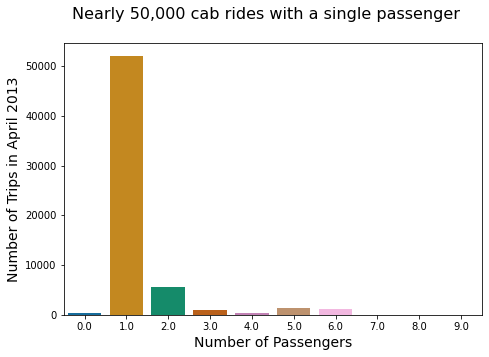

In [ ]:
fig, ax = plt.subplots(figsize=(7.5,5))
fig.suptitle('Nearly 50,000 cab rides with a single passenger', fontsize=16)
ax = sns.countplot(x='passenger_count', data = df_green_copy, palette = 'colorblind', ax=ax)
ax.set_xlabel('Number of Passengers', fontsize=14)
ax.set_ylabel('Number of Trips in April 2013', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
None

In [ ]:
a = df_green_copy.payment_type.value_counts(normalize=True)
a = a.to_frame().reset_index()
a = a.rename(columns={'index':'Type', 'payment_type':'Frequency'})
a_df = a
a_df

,Type,Frequency
0,Credit card,0.657728
1,Cash,0.334922
2,No charge,0.005557
3,Dispute,0.001777
4,Unknown,0.000016


In [ ]:
a_df.head()

,Type,Frequency
0,Credit card,0.657728
1,Cash,0.334922
2,No charge,0.005557
3,Dispute,0.001777
4,Unknown,0.000016


In [ ]:
# Could have used a dictionary here instead
a_df = a_df.replace('1','Credit Card')
a_df = a_df.replace('2','Cash')
#a_df = a_df.replace('NOC','No Charge')
#a_df = a_df.replace('DIS', 'Dispute')
#a_df = a_df.replace('UNK','Unknown')
a_df.set_index('Type', inplace=True)

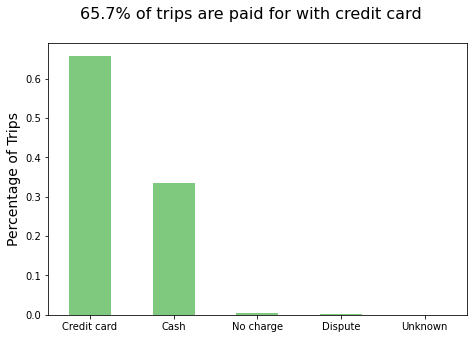

In [ ]:

fig, ax = plt.subplots(figsize=(7.5,5))
ax = a_df.plot(kind='bar', cmap='Accent', legend=False, rot=0, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Percentage of Trips', fontsize=14)
fig.suptitle('65.7% of trips are paid for with credit card', fontsize=16)
plt.ticklabel_format(style='plain', axis='y')
None

## 3. What is the distribution of the fare Amount? 

In [ ]:
print("maximum fare amount: ", df_green_copy.fare_amount.max())

print("minimum fare amount: ", df_green_copy.fare_amount.min())


maximum fare amount:  488.0
minimum fare amount:  -150.0


In [ ]:
# df_green_copy[df_green_copy.fare_amount < 0]

A numeric code signifying how the passenger paid for the trip.
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown
6= Voided trip

In [ ]:
df_green_copy = df_green_copy[df_green_copy.fare_amount > 0]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


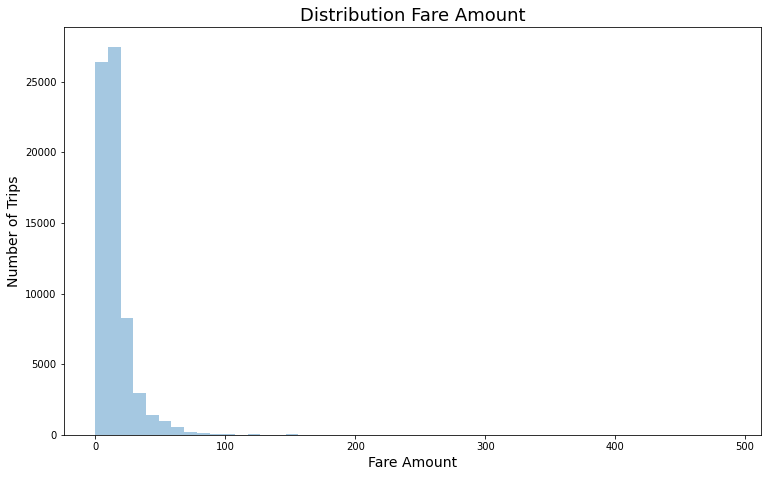

In [ ]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(df_green_copy.fare_amount, kde=False)
#ax.axvline(fare_amt_median, lw=2.5, ls='dashed', color='black')
#ax.axvline(fare_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
#ax.axvline(fare_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Distribution Fare Amount', fontsize=18)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

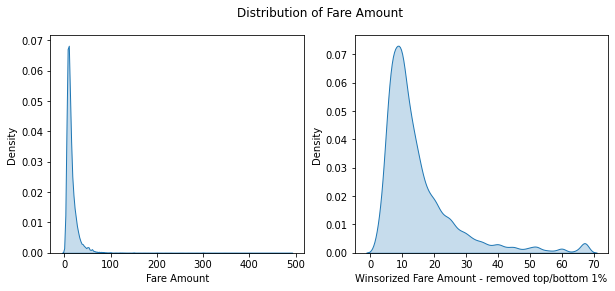

In [ ]:
from scipy.stats.mstats import winsorize


(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.kdeplot(df_green_copy.fare_amount, legend=False, ax=ax[0], shade=True)
# Remove top and bottom 1% of fare amounts
ax[1] = sns.kdeplot(winsorize(df_green_copy.fare_amount, limits=[0.01, 0.01]), legend=False, ax=ax[1], shade=True)
ax[0].set_xlabel('Fare Amount')
ax[1].set_xlabel('Winsorized Fare Amount - removed top/bottom 1%')
fig.suptitle('Distribution of Fare Amount')
None

4. What is the distribution of the tip amount?

All tips


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


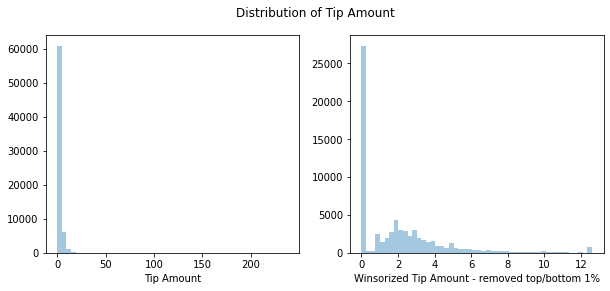

In [ ]:
(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(df_green_copy.tip_amount, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[1] = sns.distplot(winsorize(df_green_copy.tip_amount, limits=[0.01, 0.01]), ax=ax[1], kde=False)
ax[0].set_xlabel('Tip Amount')
ax[1].set_xlabel('Winsorized Tip Amount - removed top/bottom 1%')
fig.suptitle('Distribution of Tip Amount')
None

In [ ]:
import numpy as np
from scipy import stats

winsorized_tip_amt = winsorize(df_green_copy.tip_amount, limits=[0.01, 0.01])
tip_amt_median = np.median(winsorized_tip_amt)

tip_amt_lower = stats.scoreatpercentile(winsorized_tip_amt, 5)
tip_amt_upper = stats.scoreatpercentile(winsorized_tip_amt, 95)

print(tip_amt_lower, tip_amt_median, tip_amt_upper)

0.0 1.56 6.84


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


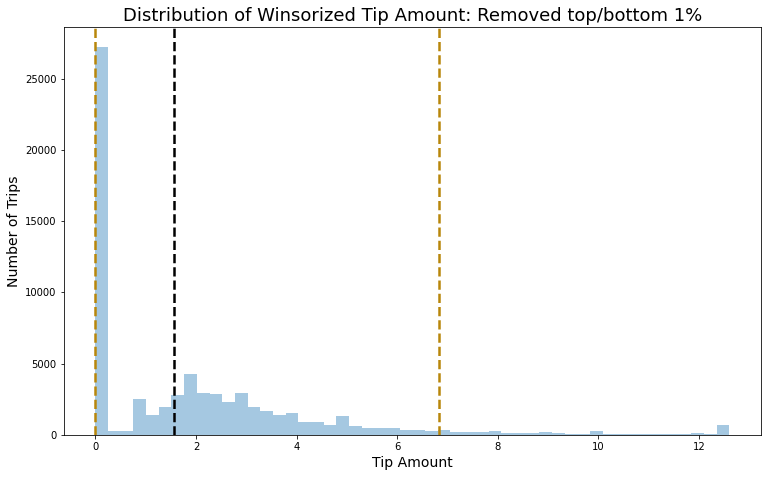

In [ ]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(winsorized_tip_amt, kde=False)
ax.axvline(tip_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(tip_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(tip_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Distribution of Winsorized Tip Amount: Removed top/bottom 1%', fontsize=18)
ax.set_xlabel('Tip Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

#### What are the top 5 busiest hours of the day?



In [ ]:
# Convert pickup_datetime and dropoff_datetime to datetime format
df_green_copy['lpep_pickup_datetime'] = pd.to_datetime(df_green_copy['lpep_pickup_datetime'])
df_green_copy['lpep_dropoff_datetime'] = pd.to_datetime(df_green_copy['lpep_dropoff_datetime'])
df_green_copy.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time_in_sec,speed
0,VeriFone Inc,2022-10-01 00:38:35,2022-10-01 00:51:03,not a store and forward trip,Standard rate,256,225,1.0,2.47,11.5,0.5,0.5,2.56,0.0,None,0.3,15.36,Credit card,Street-hail,0.00,748,11.887701
1,VeriFone Inc,2022-10-01 01:06:08,2022-10-01 01:12:33,not a store and forward trip,Standard rate,166,152,1.0,1.96,7.5,0.5,0.5,2.20,0.0,None,0.3,11.00,Credit card,Street-hail,0.00,385,18.327273
2,VeriFone Inc,2022-10-01 00:31:40,2022-10-01 00:45:15,not a store and forward trip,Standard rate,74,262,1.0,2.43,11.5,0.5,0.5,2.00,0.0,None,0.3,17.55,Credit card,Street-hail,2.75,815,10.733742
3,VeriFone Inc,2022-10-01 00:51:12,2022-10-01 00:58:42,not a store and forward trip,Standard rate,74,42,1.0,2.25,8.5,0.5,0.5,1.96,0.0,None,0.3,11.76,Credit card,Street-hail,0.00,450,18.000000
4,CMT,2022-10-01 00:42:58,2022-10-01 00:54:33,not a store and forward trip,Standard rate,74,247,1.0,0.00,17.2,0.0,0.5,0.00,0.0,None,0.3,18.00,Credit card,Street-hail,0.00,695,0.000000


In [ ]:
# Use pickup datetime to determine hour e.g. if someone was picked up at 23:15:16, they were picked up at 2300 hours
df_green_copy.groupby(df_green_copy.lpep_pickup_datetime.dt.hour)['passenger_count'].sum().sort_values(ascending=False)

lpep_pickup_datetime
17    6313.0
16    5786.0
18    5769.0
15    5453.0
14    5105.0
11    4948.0
19    4941.0
12    4813.0
9     4656.0
10    4634.0
13    4315.0
8     3877.0
20    3819.0
7     3398.0
21    3032.0
22    2477.0
23    1971.0
0     1346.0
6     1254.0
1      952.0
2      627.0
5      465.0
3      455.0
4      450.0
Name: passenger_count, dtype: float64

In [ ]:
b = df_green_copy.groupby(df_green_copy.lpep_pickup_datetime.dt.hour)['passenger_count'].size().sort_values(ascending=False).head()
b = b.to_frame().reset_index()
b = b.rename(columns={'lpep_pickup_datetime': 'hour'})
b_df = b.copy()
b_df

,hour,passenger_count
0,17,5371
1,16,4848
2,18,4787
3,15,4669
4,14,4399


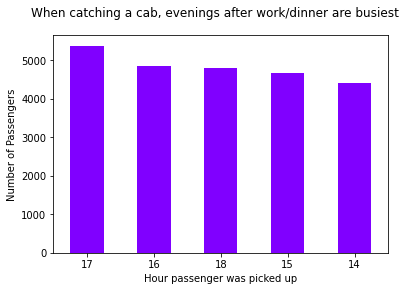

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax = b_df.set_index('hour').plot(kind='bar', colormap='rainbow', legend=False, rot=0, ax=ax)
ax.set_xlabel('Hour passenger was picked up')
ax.set_ylabel('Number of Passengers')
fig.suptitle('When catching a cab, evenings after work/dinner are busiest')
plt.ticklabel_format(style='plain', axis='y')


In [ ]:
df_green_copy['DayofWeek'] = df_green_copy.lpep_pickup_datetime.dt.day_name()
df_green_copy['Hour'] = df_green_copy.lpep_pickup_datetime.dt.hour
df_green_copy.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time_in_sec,speed,DayofWeek,Hour
0,VeriFone Inc,2022-10-01 00:38:35,2022-10-01 00:51:03,not a store and forward trip,Standard rate,256,225,1.0,2.47,11.5,0.5,0.5,2.56,0.0,None,0.3,15.36,Credit card,Street-hail,0.00,748,11.887701,Saturday,0
1,VeriFone Inc,2022-10-01 01:06:08,2022-10-01 01:12:33,not a store and forward trip,Standard rate,166,152,1.0,1.96,7.5,0.5,0.5,2.20,0.0,None,0.3,11.00,Credit card,Street-hail,0.00,385,18.327273,Saturday,1
2,VeriFone Inc,2022-10-01 00:31:40,2022-10-01 00:45:15,not a store and forward trip,Standard rate,74,262,1.0,2.43,11.5,0.5,0.5,2.00,0.0,None,0.3,17.55,Credit card,Street-hail,2.75,815,10.733742,Saturday,0
3,VeriFone Inc,2022-10-01 00:51:12,2022-10-01 00:58:42,not a store and forward trip,Standard rate,74,42,1.0,2.25,8.5,0.5,0.5,1.96,0.0,None,0.3,11.76,Credit card,Street-hail,0.00,450,18.000000,Saturday,0
4,CMT,2022-10-01 00:42:58,2022-10-01 00:54:33,not a store and forward trip,Standard rate,74,247,1.0,0.00,17.2,0.0,0.5,0.00,0.0,None,0.3,18.00,Credit card,Street-hail,0.00,695,0.000000,Saturday,0


In [ ]:
df_green_copy.DayofWeek.value_counts()

Monday       11007
Saturday     10723
Thursday      9960
Friday        9647
Wednesday     9431
Sunday        8944
Tuesday       8925
Name: DayofWeek, dtype: int64

What are the 10 most busiest Locations in the city? 

#### 10 most popular pick up locations 


In [ ]:
## Taxi Zones 

# !pip install simpledbf

from simpledbf import Dbf5

df_zone = Dbf5("/content/drive/MyDrive/NY Taxi Data/taxi_zones/taxi_zones.dbf").to_dataframe()
df_zone.head()


df_zone.set_index('LocationID',inplace=True)
borough_dict = df_zone.to_dict()["borough"]

zone_dict = df_zone.to_dict()["zone"]

# zone_dict

In [ ]:
df_green_copy.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time_in_sec,speed,DayofWeek,Hour
0,VeriFone Inc,2022-10-01 00:38:35,2022-10-01 00:51:03,not a store and forward trip,Standard rate,256,225,1.0,2.47,11.5,0.5,0.5,2.56,0.0,None,0.3,15.36,Credit card,Street-hail,0.00,748,11.887701,Saturday,0
1,VeriFone Inc,2022-10-01 01:06:08,2022-10-01 01:12:33,not a store and forward trip,Standard rate,166,152,1.0,1.96,7.5,0.5,0.5,2.20,0.0,None,0.3,11.00,Credit card,Street-hail,0.00,385,18.327273,Saturday,1
2,VeriFone Inc,2022-10-01 00:31:40,2022-10-01 00:45:15,not a store and forward trip,Standard rate,74,262,1.0,2.43,11.5,0.5,0.5,2.00,0.0,None,0.3,17.55,Credit card,Street-hail,2.75,815,10.733742,Saturday,0
3,VeriFone Inc,2022-10-01 00:51:12,2022-10-01 00:58:42,not a store and forward trip,Standard rate,74,42,1.0,2.25,8.5,0.5,0.5,1.96,0.0,None,0.3,11.76,Credit card,Street-hail,0.00,450,18.000000,Saturday,0
4,CMT,2022-10-01 00:42:58,2022-10-01 00:54:33,not a store and forward trip,Standard rate,74,247,1.0,0.00,17.2,0.0,0.5,0.00,0.0,None,0.3,18.00,Credit card,Street-hail,0.00,695,0.000000,Saturday,0


In [ ]:
df_green_copy["PULocationBorough"] = df_green_copy["PULocationID"].apply(lambda x : borough_dict[x] if x in borough_dict else x)

df_green_copy["PULocationZone"] = df_green_copy["PULocationID"].apply(lambda x : zone_dict[x] if x in zone_dict else x)

df_green_copy["DOLocationBorough"] = df_green_copy["DOLocationID"].apply(lambda x: borough_dict[x] if x in borough_dict else x)

df_green_copy["DOLocationZone"] = df_green_copy["DOLocationID"].apply(lambda x: zone_dict[x] if x in zone_dict else x)

In [ ]:
df_green_copy.PULocationZone.value_counts().head()

East Harlem North      13214
East Harlem South       8164
Central Harlem          4688
Morningside Heights     4543
Forest Hills            2643
Name: PULocationZone, dtype: int64

In [ ]:
df_green_copy.PULocationBorough.value_counts().head()

Manhattan    40351
Queens       15149
Brooklyn     10976
Bronx         1811
264            206
Name: PULocationBorough, dtype: int64

In [ ]:
df_green_copy.DOLocationZone.value_counts().head()

East Harlem North        3277
East Harlem South        3133
Central Harlem           2695
Central Harlem North     2503
Upper East Side North    2481
Name: DOLocationZone, dtype: int64

In [ ]:
df_green_copy.DOLocationBorough.value_counts().head()

Manhattan    40790
Queens       15310
Brooklyn      8565
Bronx         2881
264            671
Name: DOLocationBorough, dtype: int64

In [ ]:
pickup = df_green_copy.groupby("PULocationZone")["PULocationZone"].count().sort_values(ascending=False).head(10)

pickup = pickup.to_frame().rename(columns={'PULocationZone':'Number of Trips'}).reset_index()

pickup_df = pickup.copy()

pickup_df.head()

,PULocationZone,Number of Trips
0,East Harlem North,13214
1,East Harlem South,8164
2,Central Harlem,4688
3,Morningside Heights,4543
4,Forest Hills,2643


In [ ]:

pickup_df['Number of Trips'].sum()

43688

### What are the most popular dropoff locations? 

In [ ]:
dropoff = df_green_copy.groupby("DOLocationZone")["DOLocationZone"].count().sort_values(ascending=False).head(10)

dropoff = dropoff.to_frame().rename(columns={'DOLocationZone':'Number of Trips'}).reset_index()

dropoff_df = dropoff.copy()

dropoff_df.head()

,DOLocationZone,Number of Trips
0,East Harlem North,3277
1,East Harlem South,3133
2,Central Harlem,2695
3,Central Harlem North,2503
4,Upper East Side North,2481
